# Chapter 12: Discriminant Analysis

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt

from dmba import classificationSummary
from dmba import gainsChart, liftChart

import math
%matplotlib inline

In [3]:
# Working directory:
# replace the argument of the `Path`
DATA = Path('dmba')
# and then load data using 
# pd.read_csv(DATA / ‘filename.csv’)

## "Classification function" in Chapter 12 of the DMBA textbook is same as "disciminant function".

# Problem 12.1: Personal Loan Acceptance
Universal Bank is a relatively young bank growing
rapidly in terms of overall customer acquisition. The majority of
these customers are liability customers with varying sizes of
relationship with the bank. The customer base of asset customers is
quite small, and the bank is interested in expanding this base
rapidly to bring in more loan business. In particular, it wants to
explore ways of converting its liability customers to personal loan
customers.

A campaign the bank ran for liability customers last year showed a
healthy conversion rate of over 9\% successes. This has encouraged the
retail marketing department to devise smarter campaigns with better
target marketing. The goal of our analysis is to model the previous
campaign's customer behavior to analyze what combination of factors
make a customer more likely to accept a personal loan. This will serve
as the basis for the design of a new campaign.

The file _UniversalBank.csv_ contains data on 5000 customers. The data include customer demographic information (e.g., age, income), the customer's relationship with the bank (e.g., mortgage, securities account), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6\%)
accepted the personal loan that was offered to them in the previous campaign.

Partition the data (60\% training and 40\% validation) and then perform a discriminant analysis that models Personal Loan as a function of the remaining predictors (excluding zip code). Remember to turn categorical predictors with more than two categories into dummy variables first. Specify the success class as 1 (personal loan acceptance), and use the default cutoff value of 0.5.



In [4]:
bank_df = pd.read_csv(DATA / 'UniversalBank.csv')
bank_df = bank_df.drop(columns= ['ID', 'ZIP Code'])
outcome = 'Personal Loan'


for i in ['Education', 'Family']:
    bank_df[i] = bank_df[i].astype('category')
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True)
predictors = bank_df.drop(columns= outcome).columns
#bank_df[outcome] = bank_df[outcome].replace({1:'accpetor', 0:'nonaccpetor'})

In [5]:
# bank_df[outcome]

In [6]:
# predictors

In [7]:
for i in bank_df.columns:
    print(i + ": " + str(bank_df[i].dtype))
    print( str(bank_df[i].nunique()))
# for i in X.columns:
#     if X[i].nunique() == 2:
#         X[i] = X[i].astype('bool')

Age: int64
45
Experience: int64
47
Income: int64
162
CCAvg: float64
108
Mortgage: int64
347
Personal Loan: int64
2
Securities Account: int64
2
CD Account: int64
2
Online: int64
2
CreditCard: int64
2
Family_2: bool
2
Family_3: bool
2
Family_4: bool
2
Education_2: bool
2
Education_3: bool
2


##### convert one hot encoded values into bool to match other dummy variables. 

In [8]:
# for i in X.columns:
#     print(i + ": " + str(X[i].dtype))
#     print( str(X[i].nunique()))

In [9]:
X = bank_df[predictors]
y = bank_df[outcome]
X_train,X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1)

## Problem 12.1.a
Compute summary statistics for the predictors separately for loan acceptors and nonacceptors. For continuous predictors, compute the mean and standard deviation. For categorical predictors, compute the percentages. Are there predictors where the two classes differ substantially?

In [10]:
bank_lin = LinearDiscriminantAnalysis(priors=[0.904, 0.096])
bank_lin.fit(X_train, y_train)
print('Coefficients', bank_lin.coef_)
print('Intercept', bank_lin.intercept_)

Coefficients [[-1.55162629e-01  1.57654353e-01  5.60071693e-02  3.66498068e-01
   1.51766204e-03 -1.31260056e+00  6.38265473e+00 -5.19212551e-01
  -7.49763539e-01  5.60573969e-02  1.57801957e+00  1.42373764e+00
   2.79528480e+00  2.98957999e+00]]
Intercept [-8.64428717]


In [11]:
#X_train.columns

In [12]:
bank_lin.intercept_

array([-8.64428717])

In [13]:
bank_lin.classes_

array([0, 1], dtype=int64)

In [14]:
print('Coefficients and intercept')
fct = pd.DataFrame([bank_lin.intercept_], columns=['accept'], index=['constant'])
fct = pd.concat([fct,pd.DataFrame(bank_lin.coef_.transpose(), columns=['accept'], 
                              index=list(bank_df.columns)[:-1])])
print(fct)
print()
classificationSummary(y_train, 
                      bank_lin.predict(X_train),
                      class_names=bank_lin.classes_)
bank_df[outcome].value_counts()

Coefficients and intercept
                      accept
constant           -8.644287
Age                -0.155163
Experience          0.157654
Income              0.056007
CCAvg               0.366498
Mortgage            0.001518
Personal Loan      -1.312601
Securities Account  6.382655
CD Account         -0.519213
Online             -0.749764
CreditCard          0.056057
Family_2            1.578020
Family_3            1.423738
Family_4            2.795285
Education_2         2.989580

Confusion Matrix (Accuracy 0.9460)

       Prediction
Actual    0    1
     0 2659   54
     1  108  179


Personal Loan
0    4520
1     480
Name: count, dtype: int64

## Problem 12.1.b
Examine the model performance on the validation set.
## Problem 12.1.b.i
What is the accuracy rate?

In [15]:
print('Coefficients and intercept')
fct = pd.DataFrame([bank_lin.intercept_], columns=['accept'], index=['constant'])
fct = pd.concat([fct,pd.DataFrame(bank_lin.coef_.transpose(), columns=['accept'], 
                              index=list(bank_df.columns)[:-1])])
print(fct)
print()
classificationSummary(y_valid, 
                      bank_lin.predict(X_valid),
                      class_names=bank_lin.classes_)
bank_df[outcome].value_counts()

Coefficients and intercept
                      accept
constant           -8.644287
Age                -0.155163
Experience          0.157654
Income              0.056007
CCAvg               0.366498
Mortgage            0.001518
Personal Loan      -1.312601
Securities Account  6.382655
CD Account         -0.519213
Online             -0.749764
CreditCard          0.056057
Family_2            1.578020
Family_3            1.423738
Family_4            2.795285
Education_2         2.989580

Confusion Matrix (Accuracy 0.9430)

       Prediction
Actual    0    1
     0 1776   31
     1   83  110


Personal Loan
0    4520
1     480
Name: count, dtype: int64

the accuracy rate is 0.943

## Problem 12.1.b.ii
Is one type of misclassification more likely than the other?

A type two classifciation is more likely than a class one classifaction. False negatuve is more likley than a false postive. 

## Problem 12.1.b.iii
Select three customers who were misclassified as _acceptors_ and three who were misclassified as _nonacceptors_. The goal is to determine why they are misclassified. First, examine their probability of being classified as acceptors: is it close to the
threshold of 0.5? If not, compare their predictor values to the summary statistics of the two classes to determine why they were misclassified.

In [16]:
result_df = X_valid.copy()
result_df.index = result_df.index + 1
result_df['Actual'] = y_valid.copy()
#result_df['Dec. Function'] = bank_lin.decision_function(X_valid)
result_df['Prediction'] = bank_lin.predict(X_valid)
result_df['p(Accptor)'] = bank_lin.predict_proba(X_valid)[:, 1]

print(result_df)

      Age  Experience  Income  CCAvg  Mortgage  Securities Account  \
2765   31           5      84    2.9       105                   0   
4768   35           9      45    0.9       101                   1   
3815   34           9      35    1.3         0                   0   
3500   49          23     114    0.3       286                   0   
2736   36          12      70    2.6       165                   0   
...   ...         ...     ...    ...       ...                 ...   
4373   34          10      41    2.4         0                   0   
3402   39          15      28    1.4       118                   0   
1240   51          26      12    0.7       109                   0   
438    36           9      31    1.0         0                   1   
416    35           8      38    1.0       124                   0   

      CD Account  Online  CreditCard  Family_2  Family_3  Family_4  \
2765           0       0           1     False     False     False   
4768           0   

In [17]:
accpetors = result_df[result_df['Actual']== 0 ]
accpetors = accpetors[accpetors['Prediction']== 1].head(3)
accpetors

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Actual,Prediction,p(Accptor)
933,51,27,112,1.8,0,1,1,1,1,False,True,False,True,False,0.0,1,0.942997
4495,29,4,182,3.7,0,0,0,1,0,False,False,False,False,True,0.0,1,0.818517
1525,40,16,155,0.1,0,0,1,1,1,False,False,True,False,True,0.0,1,0.997312


In [18]:
nonaccpetors = result_df[result_df['Actual']== 1]
nonaccpetors = nonaccpetors[nonaccpetors['Prediction']== 0].head(3)
nonaccpetors

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Actual,Prediction,p(Accptor)
3945,56,26,62,1.4,0,0,0,1,0,False,True,False,False,True,1.0,0,0.005484
4590,31,7,13,0.5,0,0,0,1,0,False,False,False,False,True,1.0,0,0.000127
2672,62,37,128,2.5,0,0,0,0,0,False,False,False,False,False,1.0,0,0.012793


We can see that the missclaasifications are in line with how the model is designed to classify the classes. It missclassified accpetors ans nonacceptors beacuse those records had a probability of being acceptors that was below the cutoff value of 0.5 and vice versa. 

## Problem 12.1.c
As in many marketing campaigns, it is more important to identify customers who will accept the offer rather than customers who will not accept it. Therefore, a good model should be especially accurate at detecting acceptors. Examine the lift chart and decile-wise lift chart for the validation set and interpret them in light of this ranking goal.

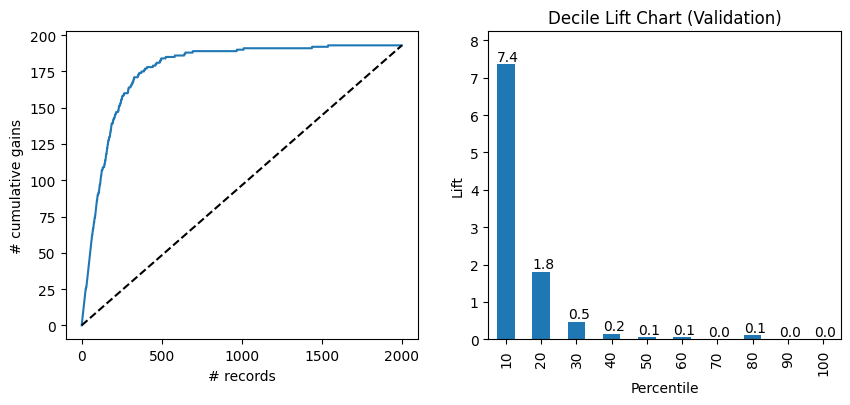

In [19]:
proba = bank_lin.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': bank_lin.predict(X_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation)')
plt.show()

The gains chart shows us that the model is defintly better than a random guess and gains a majoristy of its predictive power by the first quarter of records. The Lift chart shows us that the model itself that anythinng in teh top 10% of records that are predicted to be accpetors are 7 .4 times as liklly and the top 20% are 1.8 times as likley. This model appeares to be good at this job as it attrubutes the factors that make an accptor with alot of power making it more likley to predict a positive. 

## Problem 12.1.d
Compare the results from the discriminant analysis with those from a logistic regression (both with cutoff 0.5 and the same predictors). Examine the confusion matrices, the lift charts, and the decile charts. Which method performs better on your validation set in detecting the acceptors?

We can take the confusion matrix from the logistic regression model in chapter 10.
```
Confusion Matrix (Accuracy 0.9595)

       Prediction
Actual    0    1
     0 1791   16
     1   65  128
```

In [20]:
classificationSummary(y_valid, 
                      bank_lin.predict(X_valid),
                      class_names=bank_lin.classes_)

Confusion Matrix (Accuracy 0.9430)

       Prediction
Actual    0    1
     0 1776   31
     1   83  110


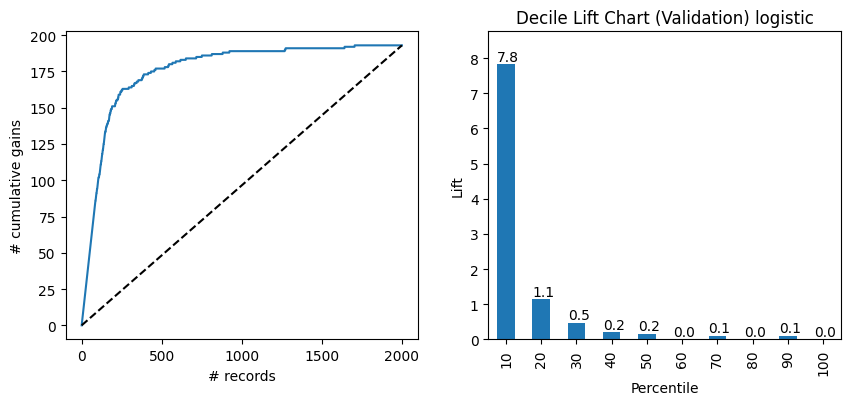

In [21]:
logit_reg_predictor = LogisticRegression(penalty="l2", C=1e42, solver='liblinear', tol=1e-8)
logit_reg_predictor.fit(X_train, y_train)
proba = logit_reg_predictor.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': logit_reg_predictor.predict(X_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation) logistic')
plt.show()

The decil and lift charts are similar to the logistic regression method but an examination of the confusion matrix shows us that the logistic regression is slighly better at predicting the acceptors. 

## Problem 12.1.e
The bank is planning to continue its campaign by sending its offer to 1000 additional customers. Suppose that the cost of sending the offer is \\$1 and the profit from an accepted offer is \\$50. What is the expected profitability of this campaign?


In [22]:
#there are two ways this can be read. in the case of perfect analysis the max profit is as follows
#profit per success * number of successes (based on initial problem statement of (9.6% success)) - cost of sending the offer
(50*(1000*9.6))- 1000

479000.0

In [23]:
#or if it is asking based on the validation set results
#profit per success * number of successes (based on confusion matrix of validation set classifcaction results adding prior) - cost of sending the offer
(50*(1000*((110/2000)+ math.log(9.6))))- 1000

114838.15492368954

## Problem 12.1.f
The cost of misclassifying a loan acceptor customer as a nonacceptor is much higher than the opposite misclassification cost. To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

To combat the missclassifaction of nonacceptors in favor of comabting the missclassifaction of acceptors we should lower the cutoff value so that more values could be classified as acceptors. 

# Problem 12.3: Detecting Spam E-mail (from the UCI Machine Learning Repository)
A team at Hewlett-Packard collected data on a large number of e-mail messages from their postmaster and personal e-mail for the purpose of finding a classifier that can separate e-mail messages that are _spam_ vs. _nonspam_ (a.k.a. 'ham'). The spam concept is diverse: It includes advertisements for products or websites, 'make money fast' schemes, chain letters, pornography, and so on. The definition used here is 'unsolicited commercial e-mail.' The file _Spambase.csv_ contains information on 4601 e-mail messages, among which 1813 are tagged 'spam.' The predictors include 57 attributes, most of them are the average number of times a certain word (e.g., mail, George) or symbol (e.g., \#, !) appears in the e-mail. A few predictors are
related to the number and length of capitalized words.

## Problem 12.3.a
To reduce the number of predictors to a manageable size, examine how each predictor differs between the _spam_ and _nonspam_ e-mails by comparing the spam-class average and nonspam-class average. Which are the 11 predictors that appear to vary the most between _spam_ and _nonspam_ e-mails? From these 11, which words or signs occur more often in spam?

In [24]:
spam_df = pd.read_csv(DATA / 'Spambase.csv')
print(spam_df.head(4))
print(spam_df.columns)
print(spam_df.dtypes)

   make  address   all  W_3d   our  over  remove  internet  order  mail  ...  \
0  0.00     0.64  0.64   0.0  0.32  0.00    0.00      0.00   0.00  0.00  ...   
1  0.21     0.28  0.50   0.0  0.14  0.28    0.21      0.07   0.00  0.94  ...   
2  0.06     0.00  0.71   0.0  1.23  0.19    0.19      0.12   0.64  0.25  ...   
3  0.00     0.00  0.00   0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   

     C;     C(   C[     C!     C$     C#  CAP_avg  CAP_long  CAP_tot  Spam  
0  0.00  0.000  0.0  0.778  0.000  0.000    3.756        61      278     1  
1  0.00  0.132  0.0  0.372  0.180  0.048    5.114       101     1028     1  
2  0.01  0.143  0.0  0.276  0.184  0.010    9.821       485     2259     1  
3  0.00  0.137  0.0  0.137  0.000  0.000    3.537        40      191     1  

[4 rows x 58 columns]
Index(['make', 'address', 'all', 'W_3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will ', 'people', 'report', 'addresses',
       'free', 'business', 'email', 

In [25]:
outcome = 'Spam'
pre_predictors = spam_df.drop(columns= outcome).columns
#spam_df[outcome] = spam_df[outcome].replace({1:'Spam', 0:'nonspam'})

In [26]:
X = spam_df[pre_predictors]
y = spam_df[outcome]
X_train,X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1)

In [27]:
spam_prior = 1813/(4601)
non_spam_prior = 1- spam_prior

In [28]:
spam_lin = LinearDiscriminantAnalysis(priors=[non_spam_prior, spam_prior])
spam_lin.fit(X_train, y_train)
print('Pre-clean')


Pre-clean


In [29]:
spam_lin.intercept_

array([-2.7778345])

In [30]:
spam_lin.means_

array([[7.55325444e-02, 2.41692308e-01, 1.98017751e-01, 9.82248521e-04,
        1.86751479e-01, 4.45443787e-02, 9.53254438e-03, 3.72840237e-02,
        4.12071006e-02, 1.63585799e-01, 2.63668639e-02, 5.36059172e-01,
        6.21360947e-02, 4.32366864e-02, 7.63313609e-03, 7.94437870e-02,
        5.04201183e-02, 9.41597633e-02, 1.30358580e+00, 9.23668639e-03,
        4.76065089e-01, 5.33668639e-02, 8.58579882e-03, 2.20946746e-02,
        8.53627219e-01, 4.14230769e-01, 1.30052663e+00, 1.87994083e-01,
        1.52059172e-01, 1.50272189e-01, 1.02840237e-01, 7.89349112e-02,
        1.45360947e-01, 7.92366864e-02, 1.57840237e-01, 1.39952663e-01,
        2.02189349e-01, 1.87100592e-02, 1.32396450e-01, 8.39171598e-02,
        5.92307692e-02, 2.01976331e-01, 6.64556213e-02, 1.13076923e-01,
        4.02372781e-01, 2.78491124e-01, 8.50887574e-03, 5.70118343e-02,
        5.61857988e-02, 1.59115385e-01, 2.41526627e-02, 1.15302959e-01,
        1.18887574e-02, 2.39757396e-02, 2.44909586e+00, 1.783786

In [31]:
fct = pd.DataFrame([spam_lin.intercept_], columns=['Spam'], index=['constant'])
fct = pd.concat([fct,pd.DataFrame(spam_lin.coef_.transpose(), columns=['Spam'], 
                              index=list(spam_df.columns)[:-1])])
print(fct)
print()
# classificationSummary(y_valid, 
#                       spam_lin.predict(X_valid),
#                       class_names=spam_lin.classes_)
# spam_df[outcome].value_counts()

                Spam
constant   -2.777835
make       -0.534556
address    -0.107026
all         0.460331
W_3d        0.106153
our         0.681662
over        1.050761
remove      2.215250
internet    0.813391
order       0.726491
mail        0.108306
receive     0.090852
will       -0.268442
people      0.155832
report      0.088728
addresses   0.148612
free        0.645780
business    0.425394
email       0.654514
you         0.142759
credit      0.583503
your        0.455602
font        0.425402
W_000       1.701887
money       0.771707
hp         -0.180000
hpl        -0.264858
george     -0.121531
W_650       0.019865
lab        -0.194421
labs       -0.617799
telnet     -0.331635
W_857       3.279346
data       -0.392931
W_415      -2.505151
W_85       -0.363785
technology  0.510646
W_1999     -0.526794
parts      -0.364431
pm         -0.058238
direct      0.362682
cs          0.028815
meeting    -0.323876
original   -0.328954
project    -0.404217
re:        -0.457158
edu        -0

In [32]:
#get the 11 largest coeffeicents regardless if they are positive or negative to get most influenttial parameters
#made it the top 12 to ognore intercept 
fct.abs().sort_values(by='Spam',ascending=False).head(12)
#fct.sort_values(by='Spam',ascending=False).head(12)

,Spam
W_857,3.279346
constant,2.777835
W_415,2.505151
remove,2.215250
C$,2.146581
W_000,1.701887
table,1.627192
C;,1.344570
over,1.050761
internet,0.813391


In [33]:
spam_lin.classes_

array([0, 1], dtype=int64)

Based on the above list we will be using W_857. W_415, remove, C$, W_000, table, C;, over, internet, money, and C[

In [34]:
spam_lin.priors_

array([0.60595523, 0.39404477])

In [35]:
spam_df.columns

Index(['make', 'address', 'all', 'W_3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will ', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you ', 'credit', 'your', 'font', 'W_000',
       'money', 'hp', 'hpl', 'george', 'W_650', 'lab', 'labs', 'telnet',
       'W_857', 'data', 'W_415', 'W_85', 'technology', 'W_1999', 'parts', 'pm',
       'direct', 'cs', 'meeting', 'original', 'project ', 're:', 'edu',
       'table ', 'conference', 'C;', 'C(', 'C[', 'C!', 'C$', 'C#', 'CAP_avg',
       'CAP_long', 'CAP_tot', 'Spam'],
      dtype='object')

## Problem 12.3.b
Partition the data into training and validation sets, then perform a discriminant analysis on the training data using only the 11 predictors.

In [36]:
predictors = ['W_85', 'W_415', 'remove', 'C$', 'W_000', 'table ', 'C;', 'over', 'internet', 'money','C[']
#subset = predictors.append(outcome)
X = spam_df[predictors]
y = spam_df[outcome]
X_train,X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1)

In [37]:
predictors

['W_85',
 'W_415',
 'remove',
 'C$',
 'W_000',
 'table ',
 'C;',
 'over',
 'internet',
 'money',
 'C[']

In [38]:
spam_lin = LinearDiscriminantAnalysis(priors=[non_spam_prior, spam_prior])
spam_lin.fit(X_train, y_train)
fct = pd.DataFrame([spam_lin.intercept_], columns=['Spam'], index=['constant'])
fct = pd.concat([fct,pd.DataFrame(spam_lin.coef_.transpose(), columns=['Spam'], 
                              index=list(predictors))])
print(fct)
print()
classificationSummary(y_valid, 
                      spam_lin.predict(X_valid),
                      class_names=spam_lin.classes_)
spam_df[outcome].value_counts()

              Spam
constant -1.532818
W_85     -0.717683
W_415     0.064599
remove    2.358902
C$        2.395071
W_000     1.797057
table    -1.316170
C;       -0.475198
over      1.353337
internet  0.974867
money     0.966896
C[       -1.242485

Confusion Matrix (Accuracy 0.7979)

       Prediction
Actual    0    1
     0 1072   26
     1  346  397


Spam
0    2788
1    1813
Name: count, dtype: int64

## Problem 12.3.c
If we are interested mainly in detecting spam messages, is this model useful? Use the confusion matrix, lift chart, and decile chart for the validation set for the evaluation.

Confusion Matrix (Accuracy 0.7979)

       Prediction
Actual    0    1
     0 1072   26
     1  346  397


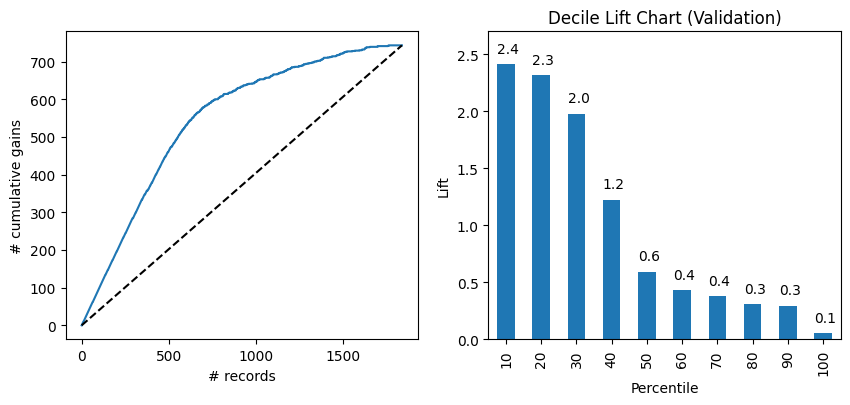

In [39]:
classificationSummary(y_valid, 
                      spam_lin.predict(X_valid),
                      class_names=spam_lin.classes_)
proba = spam_lin.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': spam_lin.predict(X_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation)')
plt.show()

This model still performs well for detecting spam messages. The gains chart shows the model has some predictive value and the dispersion of the lift chart shows that the models classifiction is on the right path as its main predictors that determine which records will be spam have lead to those records being more likley to be spam the lower in percentile it goes. 

## Problem 12.3.d
In the sample, almost 40\% of the e-mail messages were tagged as spam. However, suppose that the actual proportion of spam messages in these e-mail accounts is 10\%. Compute the intercept of the classification (discriminant) function to account for this information.

In [40]:
spam_lin = LinearDiscriminantAnalysis(priors=[0.9, 0.1])
spam_lin.fit(X_train, y_train)
spam_lin.intercept_

array([-3.29970108])

In [41]:
spam_lin.intercept_[0]

-3.2997010846323036

## Problem 12.3.e
A spam filter that is based on your model is used, so that only messages that are classified as _nonspam_ are delivered, while messages that are classified as _spam_ are quarantined. In this case, misclassifying a nonspam e-mail (as spam) has much heftier results. Suppose that the cost of quarantining a nonspam e-mail is 20 times
that of not detecting a spam message. Compute the intercept of the classification (discriminant) function to account for these costs (<b>assume that the proportion of spam is reflected correctly by the sample proportion</b>).

In [42]:
spam_lin = LinearDiscriminantAnalysis(priors=[non_spam_prior, spam_prior])
spam_lin.fit(X_train, y_train)
#only one class constant which is for spam in this case
spam_lin.intercept_[0] + math.log(20)

1.4629142051323432

In [43]:
math.log(1)

0.0

## Problem 12.3.f
Use the LinearDiscriminantAnalysis implementation in sklearn to adjust the priors to take the misclassification costs in 12.3.e into account. Does adjusting the priors to take the misclassification costs into account lead to a model which predicts fewer <i>nonspam</i> messages as <i>spam</i>? Report the numerical result.

In [44]:
non_spam_prior_new = (non_spam_prior * 20)/((non_spam_prior * 20)+ (spam_prior*1))
spam_prior_new = (spam_prior*1)/((non_spam_prior * 20)+ (spam_prior*1))

In [45]:
spam_prior_new

0.03149045559550484

In [46]:
spam_lin = LinearDiscriminantAnalysis(priors=[non_spam_prior_new, spam_prior_new])
spam_lin.fit(X_train, y_train)
classificationSummary(y_valid, 
                      spam_lin.predict(X_valid),
                      class_names=spam_lin.classes_)

Confusion Matrix (Accuracy 0.6328)

       Prediction
Actual    0    1
     0 1096    2
     1  674   69


It does lead to less non_spam messages being marked as spam. with the number of non_spam emails missclassified as spam going down from 26 to 2. 